In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
#Standardizing numeric variables using MinMax scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [3]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [4]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
pandas_profiling.ProfileReport(train_data)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [6]:
# Drop NA values row wise
train_data.dropna(subset=['Embarked'],axis=0,inplace=True)

In [7]:
train_data['Age']=train_data['Age'].replace(np.NaN, train_data['Age'].median())
train_data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
train_data['temp'] = train_data["Name"].str.split(",", n=1, expand=True)[1]
train_data['temp'].head()


0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: temp, dtype: object

In [10]:
train_data['title']= train_data['temp'].str.split(".",n=1, expand=True)[0]
train_data['title'].value_counts()

 Mr              517
 Miss            181
 Mrs             124
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 the Countess      1
 Sir               1
 Jonkheer          1
 Don               1
 Capt              1
 Lady              1
 Ms                1
 Mme               1
Name: title, dtype: int64

In [11]:
train_data['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [12]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#Binary variables
train_data['Sex'] = train_data['Sex'].map({'female': 1, "male": 0})
train_data['Pclass'] = train_data['Pclass'].map({1: 'one', 2:'two', 3:'three'})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,temp,title
0,1,0,three,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Mr
1,2,1,one,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,three,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Miss
3,4,1,one,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Mrs
4,5,0,three,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,Mr


In [14]:
#Dummy values
dummy_list =['Embarked','title','Pclass']
dummies = pd.get_dummies(train_data[dummy_list],prefix_sep='_', drop_first=True)
dummies.head()

,Embarked_Q,Embarked_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_three,Pclass_two
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [15]:
train_data = pd.concat([train_data, dummies], axis = 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,temp,title,Embarked_Q,Embarked_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_three,Pclass_two
0,1,0,three,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Mr,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2,1,one,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,three,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Miss,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,4,1,one,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Mrs,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,three,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,Mr,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [16]:
#drop passengerID,cabin, ticket,temp,name,embarked
train_data.drop(labels=['PassengerId','Name','Pclass','Ticket','Cabin','Embarked','temp','title'],inplace=True,axis=1)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_three,Pclass_two
0,0,0,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [17]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['SibSp','Fare','Parch','Age']
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])
train_data.head()

C:\Users\megha goyal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_three,Pclass_two
0,0,0,0.271174,0.125,0.0,0.014151,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,1,0.472229,0.125,0.0,0.139136,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,0.321438,0.000,0.0,0.015469,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,0.434531,0.125,0.0,0.103644,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0.434531,0.000,0.0,0.015713,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [18]:
Y_train = train_data['Survived']
X_train = train_data.drop('Survived', axis=1)
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_three,Pclass_two
0,0,0.271174,0.125,0.0,0.014151,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0.472229,0.125,0.0,0.139136,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0.321438,0.000,0.0,0.015469,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,0.434531,0.125,0.0,0.103644,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.434531,0.000,0.0,0.015713,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [19]:
train_data.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_three,Pclass_two
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,0.350956,0.363096,0.065523,0.063742,0.062649,0.086614,0.724409,0.002250,0.001125,0.007874,0.001125,0.001125,0.002250,0.044994,0.203600,0.002250,0.001125,0.581552,0.139483,0.001125,0.006749,0.001125,0.001125,0.552306,0.206974
std,0.486260,0.477538,0.163168,0.137963,0.134460,0.097003,0.281427,0.447063,0.047404,0.033539,0.088435,0.033539,0.033539,0.047404,0.207408,0.402901,0.047404,0.033539,0.493582,0.346644,0.033539,0.081922,0.033539,0.033539,0.497536,0.405365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.346569,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#from sklearn.linear_model import LinearRegression

In [21]:
rfe = RFE(logreg, 10)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, Y_train)

C:\Users\megha goyal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\megha goyal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\megha goyal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\megha goyal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\megha goyal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [22]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1),
 ('Embarked_Q', False, 12),
 ('Embarked_S', False, 4),
 ('title_ Col', False, 16),
 ('title_ Don', False, 3),
 ('title_ Dr', False, 7),
 ('title_ Jonkheer', False, 5),
 ('title_ Lady', False, 11),
 ('title_ Major', False, 15),
 ('title_ Master', True, 1),
 ('title_ Miss', False, 8),
 ('title_ Mlle', False, 10),
 ('title_ Mme', False, 14),
 ('title_ Mr', True, 1),
 ('title_ Mrs', False, 2),
 ('title_ Ms', False, 9),
 ('title_ Rev', True, 1),
 ('title_ Sir', False, 6),
 ('title_ the Countess', False, 13),
 ('Pclass_three', True, 1),
 ('Pclass_two', True, 1)]

In [23]:
col = X_train.columns[rfe.support_]
col

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'title_ Master', 'title_ Mr', 'title_ Rev', 'Pclass_three', 'Pclass_two'], dtype='object')

In [24]:
X_train_rfe = X_train[col]

In [98]:
X_train_rfe.head()

,Sex,Age,SibSp,Parch,Fare,title_ Master,title_ Mr,title_ Rev,Pclass_three,Pclass_two
0,0,0.271174,0.125,0.0,0.014151,0,1,0,1,0
1,1,0.472229,0.125,0.0,0.139136,0,0,0,0,0
2,1,0.321438,0.000,0.0,0.015469,0,0,0,1,0
3,1,0.434531,0.125,0.0,0.103644,0,0,0,0,0
4,0,0.434531,0.000,0.0,0.015713,0,1,0,1,0


In [99]:
X_train_rfe.shape

(889, 10)

In [25]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

C:\Users\megha goyal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      878
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -365.91
Date:                Mon, 05 Aug 2019   Deviance:                       731.82
Time:                        22:26:02   Pearson chi2:                     905.
No. Iterations:                    20   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4520      0.706      0.640      0.522      -0.931       1.835
Sex               2.9925      0.631      4.741      0.000       1.755       4.230
Age              -1.4897      0.667     -2.233      0.026      -2.797      -0.182
SibSp            -4.5265      0.975     -4.644      0.000      -6.437      -2.616
Parch            -1.7851      0.767     -2.326      0.020      -3.289      -0.281
Fare              2.1519      1.346      1.599      0.110      -0.486       4.790
title_ Master     3.3670      0.800      4.211      0.000       1.800       4.934
title_ Mr        -0.2986      0.603     -0.495      0.620      -1.481       0.883
title_ Rev      -20.1966   1.18e+04     -0.002      0.999   -2.32e+04    2.32e+04
Pclass_three     -2.0689      0.307     -6.735      0.000      -2.671      -1.467
Pclass_two       -0.9842      0.313     -3.140      0.002      -1.598      -0.370
=================================================================================
"""

In [26]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,title_ Mr,10.75
1,Age,6.49
0,Sex,6.40
8,Pclass_three,5.77
9,Pclass_two,2.53
4,Fare,2.41
5,title_ Master,1.72
3,Parch,1.67
2,SibSp,1.66
7,title_ Rev,1.19


In [27]:
X_train_2 = X_train_rfe.drop("title_ Rev",axis=1)
X_train_sm = sm.add_constant(X_train_2)
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

C:\Users\megha goyal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -367.06
Date:                Mon, 05 Aug 2019   Deviance:                       734.12
Time:                        22:26:02   Pearson chi2:                     912.
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1621      0.680      0.238      0.812      -1.170       1.494
Sex               3.3324      0.586      5.682      0.000       2.183       4.482
Age              -1.5014      0.666     -2.255      0.024      -2.806      -0.196
SibSp            -4.5017      0.974     -4.624      0.000      -6.410      -2.594
Parch            -1.7955      0.767     -2.340      0.019      -3.300      -0.291
Fare              2.0770      1.339      1.551      0.121      -0.548       4.702
title_ Master     3.7013      0.766      4.832      0.000       2.200       5.203
title_ Mr         0.0313      0.560      0.056      0.955      -1.066       1.129
Pclass_three     -2.1102      0.305     -6.908      0.000      -2.709      -1.511
Pclass_two       -1.0535      0.309     -3.409      0.001      -1.659      -0.448
=================================================================================
"""

In [28]:
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,title_ Mr,9.42
1,Age,5.95
0,Sex,5.67
7,Pclass_three,5.40
4,Fare,2.35
8,Pclass_two,2.29
3,Parch,1.67
5,title_ Master,1.67
2,SibSp,1.66


In [29]:
X_train_3 = X_train_2.drop("title_ Mr",axis=1)
X_train_sm = sm.add_constant(X_train_3)
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

C:\Users\megha goyal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -367.06
Date:                Mon, 05 Aug 2019   Deviance:                       734.13
Time:                        22:26:02   Pearson chi2:                     912.
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1921      0.416      0.462      0.644      -0.623       1.008
Sex               3.3022      0.227     14.561      0.000       2.858       3.747
Age              -1.5056      0.662     -2.276      0.023      -2.802      -0.209
SibSp            -4.5044      0.972     -4.632      0.000      -6.410      -2.599
Parch            -1.7954      0.767     -2.339      0.019      -3.300      -0.291
Fare              2.0825      1.336      1.559      0.119      -0.536       4.701
title_ Master     3.6703      0.529      6.939      0.000       2.634       4.707
Pclass_three     -2.1082      0.303     -6.946      0.000      -2.703      -1.513
Pclass_two       -1.0525      0.309     -3.412      0.001      -1.657      -0.448
=================================================================================
"""

In [30]:
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,3.31
6,Pclass_three,2.41
4,Fare,1.91
0,Sex,1.72
3,Parch,1.67
2,SibSp,1.66
7,Pclass_two,1.62
5,title_ Master,1.36


In [31]:
X_train_4 = X_train_3.drop("Fare",axis=1)
X_train_sm = sm.add_constant(X_train_4)
logm4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

C:\Users\megha goyal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -368.47
Date:                Mon, 05 Aug 2019   Deviance:                       736.94
Time:                        22:26:02   Pearson chi2:                     923.
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5033      0.369      1.365      0.172      -0.219       1.226
Sex               3.3063      0.226     14.614      0.000       2.863       3.750
Age              -1.6019      0.659     -2.433      0.015      -2.893      -0.311
SibSp            -4.2985      0.955     -4.499      0.000      -6.171      -2.426
Parch            -1.5172      0.743     -2.041      0.041      -2.974      -0.060
title_ Master     3.6121      0.525      6.886      0.000       2.584       4.640
Pclass_three     -2.3725      0.256     -9.276      0.000      -2.874      -1.871
Pclass_two       -1.2734      0.277     -4.603      0.000      -1.816      -0.731
=================================================================================
"""

In [32]:
vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,2.38
5,Pclass_three,2.01
0,Sex,1.63
2,SibSp,1.62
3,Parch,1.62
6,Pclass_two,1.48
4,title_ Master,1.34


In [33]:
# Getting the predicted values on the train set
y_train_pred = res4.predict(X_train_sm)
y_train_pred[:10]

0    0.055156
1    0.925248
2    0.715502
3    0.929319
4    0.071410
5    0.081336
6    0.360037
7    0.461669
8    0.597822
9    0.848850
dtype: float64

In [34]:
y_train_pred_final = pd.DataFrame({'Survival':Y_train.values, 'Survival_Prob':y_train_pred})
y_train_pred_final['Passenger_ID'] = Y_train.index
y_train_pred_final.head(20)

,Survival,Survival_Prob,Passenger_ID
0,0,0.055156,0
1,1,0.925248,1
2,1,0.715502,2
3,1,0.929319,3
4,0,0.071410,4
5,0,0.081336,5
6,0,0.360037,6
7,0,0.461669,7
8,1,0.597822,8
9,1,0.848850,9


In [35]:
# Finding optimal cutoff probablity
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survival,Survival_Prob,Passenger_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055156,0,1,0,0,0,0,0,0,0,0,0
1,1,0.925248,1,1,1,1,1,1,1,1,1,1,1
2,1,0.715502,2,1,1,1,1,1,1,1,1,0,0
3,1,0.929319,3,1,1,1,1,1,1,1,1,1,1
4,0,0.071410,4,1,0,0,0,0,0,0,0,0,0


In [63]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survival, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382452  1.000000  0.000000
0.1   0.1  0.671541  0.897059  0.531876
0.2   0.2  0.727784  0.873529  0.637523
0.3   0.3  0.778403  0.829412  0.746812
0.4   0.4  0.816648  0.797059  0.828780
0.5   0.5  0.831271  0.726471  0.896175
0.6   0.6  0.825647  0.661765  0.927140
0.7   0.7  0.821147  0.614706  0.948998
0.8   0.8  0.779528  0.444118  0.987250
0.9   0.9  0.707537  0.244118  0.994536


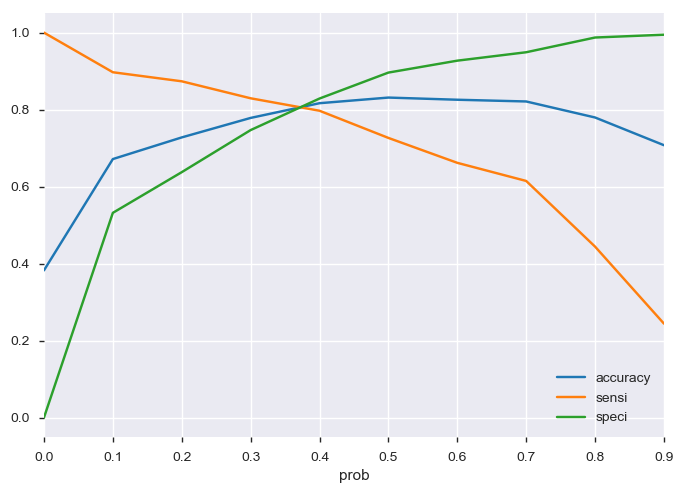

In [50]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [76]:
y_train_pred_final['predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Survival,Survival_Prob,Passenger_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.055156,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.925248,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.715502,2,1,1,1,1,1,1,1,1,0,0,1
3,1,0.929319,3,1,1,1,1,1,1,1,1,1,1,1
4,0,0.071410,4,1,0,0,0,0,0,0,0,0,0,0
5,0,0.081336,5,1,0,0,0,0,0,0,0,0,0,0
6,0,0.360037,6,1,1,1,1,0,0,0,0,0,0,0
7,0,0.461669,7,1,1,1,1,1,0,0,0,0,0,1
8,1,0.597822,8,1,1,1,1,1,1,0,0,0,0,1
9,1,0.848850,9,1,1,1,1,1,1,1,1,1,0,1


In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survival, y_train_pred_final.predicted )
print(confusion)

[[455  94]
 [ 69 271]]


In [78]:
print(metrics.accuracy_score(y_train_pred_final.Survival, y_train_pred_final.predicted))

0.8166479190101237


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8117647058823529

In [81]:
# Let us calculate specificity
TN / float(TN+FP)

0.8105646630236795

In [82]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1894353369763206


In [83]:
# positive predictive value 
print (TP / float(TP+FP))

0.7263157894736842


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8742632612966601


In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survival, y_train_pred_final.Survival_Prob, drop_intermediate = False )

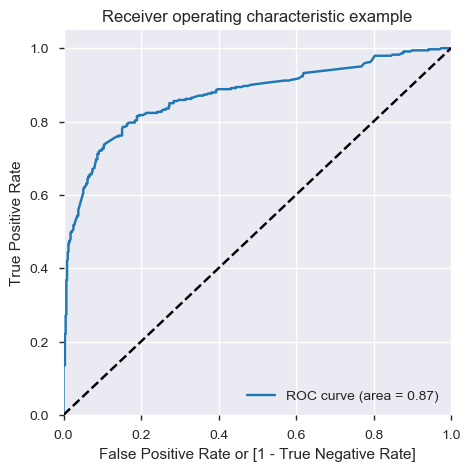

In [87]:
draw_roc(y_train_pred_final.Survival, y_train_pred_final.Survival_Prob)

In [88]:
from sklearn.metrics import precision_score, recall_score

In [89]:
#Checking the precision
precision_score(y_train_pred_final.Survival, y_train_pred_final.predicted)

0.7424657534246575

In [90]:
#Checking the recall
recall_score(y_train_pred_final.Survival, y_train_pred_final.predicted)

0.7970588235294118

In [91]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Survival, y_train_pred_final.predicted

(0      0
 1      1
 2      1
 3      1
 4      0
 5      0
 6      0
 7      0
 8      1
 9      1
 10     1
 11     1
 12     0
 13     0
 14     0
 15     1
 16     0
 17     1
 18     0
 19     1
 20     0
 21     1
 22     1
 23     1
 24     0
 25     1
 26     0
 27     0
 28     1
 29     0
 30     0
 31     1
 32     1
 33     0
 34     0
 35     0
 36     1
 37     0
 38     0
 39     1
 40     0
 41     0
 42     0
 43     1
 44     1
 45     0
 46     0
 47     1
 48     0
 49     0
 50     0
 51     0
 52     1
 53     1
 54     0
 55     1
 56     1
 57     0
 58     1
 59     0
 60     0
 62     0
 63     0
 64     0
 65     1
 66     1
 67     0
 68     1
 69     0
 70     0
 71     0
 72     0
 73     0
 74     1
 75     0
 76     0
 77     0
 78     1
 79     1
 80     0
 81     1
 82     1
 83     0
 84     1
 85     1
 86     0
 87     0
 88     1
 89     0
 90     0
 91     0
 92     0
 93     0
 94     0
 95     0
 96     0
 97     1
 98     1
 99     0
 100    0


In [92]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survival, y_train_pred_final.Survival_Prob)

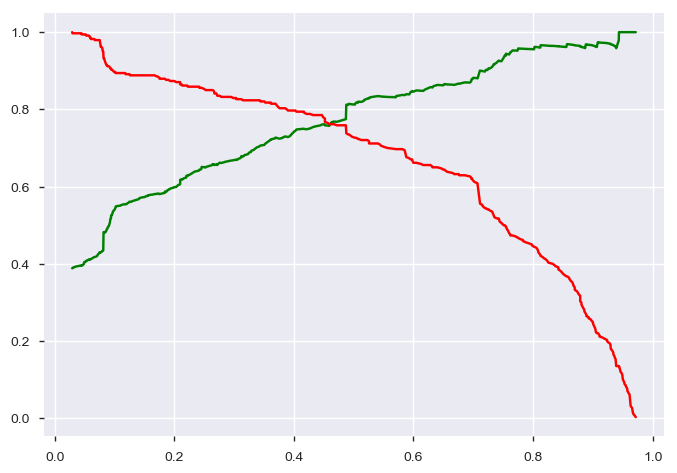

In [93]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on test data

In [131]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [133]:
#Drop row wise Nan values
test_data.dropna(subset=['Fare'], axis=0, inplace=True)

In [134]:
test_data['Age']=test_data['Age'].replace(np.NaN, train_data['Age'].median())
test_data['Age'].head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [135]:
test_data['temp'] = test_data["Name"].str.split(",", n=1, expand=True)[1]
test_data['temp'].head()


0                              Mr. James
1               Mrs. James (Ellen Needs)
2                     Mr. Thomas Francis
3                             Mr. Albert
4     Mrs. Alexander (Helga E Lindqvist)
Name: temp, dtype: object

In [136]:
test_data['title']= test_data['temp'].str.split(".",n=1, expand=True)[0]
test_data['title'].value_counts()

 Mr        239
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Dr          1
 Ms          1
 Dona        1
Name: title, dtype: int64

In [137]:
#Binary variables
test_data['Sex'] = test_data['Sex'].map({'female': 1, "male": 0})
test_data['Pclass'] = test_data['Pclass'].map({1: 'one', 2:'two', 3:'three'})
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,temp,title
0,892,three,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr. James,Mr
1,893,three,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs. James (Ellen Needs),Mrs
2,894,two,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr. Thomas Francis,Mr
3,895,three,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr. Albert,Mr
4,896,three,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs. Alexander (Helga E Lindqvist),Mrs


In [138]:
#Dummy values
dummy_list =['Embarked','title','Pclass']
dummies = pd.get_dummies(test_data[dummy_list],prefix_sep='_', drop_first=True)
dummies.head()

,Embarked_Q,Embarked_S,title_ Dona,title_ Dr,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,Pclass_three,Pclass_two
0,1,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,1,0


In [139]:
test_data = pd.concat([test_data, dummies], axis = 1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,temp,title,Embarked_Q,Embarked_S,title_ Dona,title_ Dr,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,Pclass_three,Pclass_two
0,892,three,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr. James,Mr,1,0,0,0,0,0,1,0,0,0,1,0
1,893,three,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs. James (Ellen Needs),Mrs,0,1,0,0,0,0,0,1,0,0,1,0
2,894,two,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr. Thomas Francis,Mr,1,0,0,0,0,0,1,0,0,0,0,1
3,895,three,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr. Albert,Mr,0,1,0,0,0,0,1,0,0,0,1,0
4,896,three,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs. Alexander (Helga E Lindqvist),Mrs,0,1,0,0,0,0,0,1,0,0,1,0


In [140]:
#drop passengerID,cabin, ticket,temp,name,embarked
test_data.drop(labels=['PassengerId','Name','Pclass','Ticket','Cabin','Embarked','temp','title'],inplace=True,axis=1)
test_data.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,title_ Dona,title_ Dr,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,Pclass_three,Pclass_two
0,0,34.5,0,0,7.8292,1,0,0,0,0,0,1,0,0,0,1,0
1,1,47.0,1,0,7.0000,0,1,0,0,0,0,0,1,0,0,1,0
2,0,62.0,0,0,9.6875,1,0,0,0,0,0,1,0,0,0,0,1
3,0,27.0,0,0,8.6625,0,1,0,0,0,0,1,0,0,0,1,0
4,1,22.0,1,1,12.2875,0,1,0,0,0,0,0,1,0,0,1,0


In [141]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['SibSp','Fare','Parch','Age']
test_data[num_vars] = scaler.transform(test_data[num_vars])
test_data.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,title_ Dona,title_ Dr,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,Pclass_three,Pclass_two
0,0,0.428248,0.000,0.000000,0.015282,1,0,0,0,0,0,1,0,0,0,1,0
1,1,0.585323,0.125,0.000000,0.013663,0,1,0,0,0,0,0,1,0,0,1,0
2,0,0.773813,0.000,0.000000,0.018909,1,0,0,0,0,0,1,0,0,0,0,1
3,0,0.334004,0.000,0.000000,0.016908,0,1,0,0,0,0,1,0,0,0,1,0
4,1,0.271174,0.125,0.166667,0.023984,0,1,0,0,0,0,0,1,0,0,1,0


In [142]:
test_data.isnull().sum()

Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked_Q       0
Embarked_S       0
title_ Dona      0
title_ Dr        0
title_ Master    0
title_ Miss      0
title_ Mr        0
title_ Mrs       0
title_ Ms        0
title_ Rev       0
Pclass_three     0
Pclass_two       0
dtype: int64

In [143]:
#Drop columns from non rfe support
test_data.drop(labels=['Embarked_Q','Embarked_S','title_ Ms','title_ Mrs','title_ Miss','title_ Dona','title_ Dr','title_ Rev','Fare','title_ Mr'],inplace=True,axis=1)
test_data.head()

,Sex,Age,SibSp,Parch,title_ Master,Pclass_three,Pclass_two
0,0,0.428248,0.000,0.000000,0,1,0
1,1,0.585323,0.125,0.000000,0,1,0
2,0,0.773813,0.000,0.000000,0,0,1
3,0,0.334004,0.000,0.000000,0,1,0
4,1,0.271174,0.125,0.166667,0,1,0


In [ ]:
'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'title_ Master', 'title_ Mr', 'title_ Rev', 'Pclass_three', 'Pclass_two'

In [144]:
test_data.shape

(417, 7)

In [147]:
X_test = test_data
X_test.head()

,Sex,Age,SibSp,Parch,title_ Master,Pclass_three,Pclass_two
0,0,0.428248,0.000,0.000000,0,1,0
1,1,0.585323,0.125,0.000000,0,1,0
2,0,0.773813,0.000,0.000000,0,0,1
3,0,0.334004,0.000,0.000000,0,1,0
4,1,0.271174,0.125,0.166667,0,1,0


In [148]:
X_test_sm = sm.add_constant(X_test)

C:\Users\megha goyal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [149]:
# y_train_pred = res4.predict(X_train_sm)
# y_train_pred[:10]
y_test_pred = res4.predict(X_test_sm)
# y_test_pred[:10]

In [150]:
y_test_pred[:10]

0    0.072080
1    0.490560
2    0.118196
3    0.082853
4    0.552951
5    0.105032
6    0.698832
7    0.111537
8    0.747117
9    0.033633
dtype: float64

In [164]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
0,0.072080
1,0.490560
2,0.118196
3,0.082853
4,0.552951
5,0.105032
6,0.698832
7,0.111537
8,0.747117
9,0.033633


In [165]:
y_pred_1['PassengerID'] = test_data.index

In [167]:
y_pred_1.reset_index(drop=True, inplace=True)
y_pred_1

,0,PassengerID
0,0.072080,0
1,0.490560,1
2,0.118196,2
3,0.082853,3
4,0.552951,4
5,0.105032,5
6,0.698832,6
7,0.111537,7
8,0.747117,8
9,0.033633,9


In [168]:
y_pred_1= y_pred_1.rename(columns={ 0 : 'Survival_Prob'})
y_pred_1

,Survival_Prob,PassengerID
0,0.072080,0
1,0.490560,1
2,0.118196,2
3,0.082853,3
4,0.552951,4
5,0.105032,5
6,0.698832,6
7,0.111537,7
8,0.747117,8
9,0.033633,9


In [169]:
y_pred_1['final_predicted'] = y_pred_1.Survival_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [170]:
y_pred_1

,Survival_Prob,PassengerID,final_predicted
0,0.072080,0,0
1,0.490560,1,1
2,0.118196,2,0
3,0.082853,3,0
4,0.552951,4,1
5,0.105032,5,0
6,0.698832,6,1
7,0.111537,7,0
8,0.747117,8,1
9,0.033633,9,0
